<a href="https://colab.research.google.com/github/piyushrockzz/ExcelR-Projects-/blob/main/Assignment_07_Clustering(Airlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#Read the dataset
data = pd.read_csv('EastWestAirlines.csv')
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
#Drop the 'ID' column
data = data.drop('ID#', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
#Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['cc1_miles', 'cc2_miles', 'cc3_miles'])

In [ ]:
#Normalize the numerical variables
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
#Perform hierarchical clustering using complete linkage
linkage_matrix = linkage(data_scaled, method='complete')

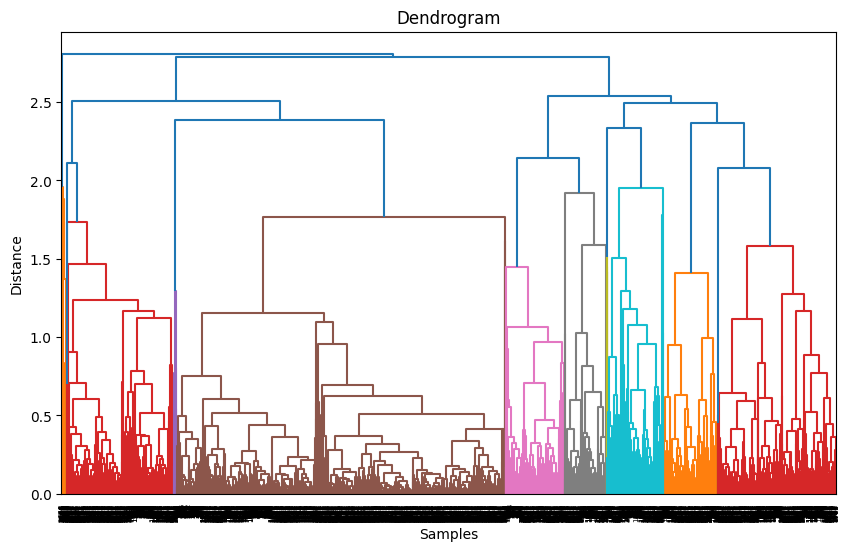

In [ ]:
#Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Choose the number of clusters based on the dendrogram
num_clusters = 4

In [ ]:
#Perform clustering using AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='complete')
hc_clusters = hc.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# K-means Clustering
#Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

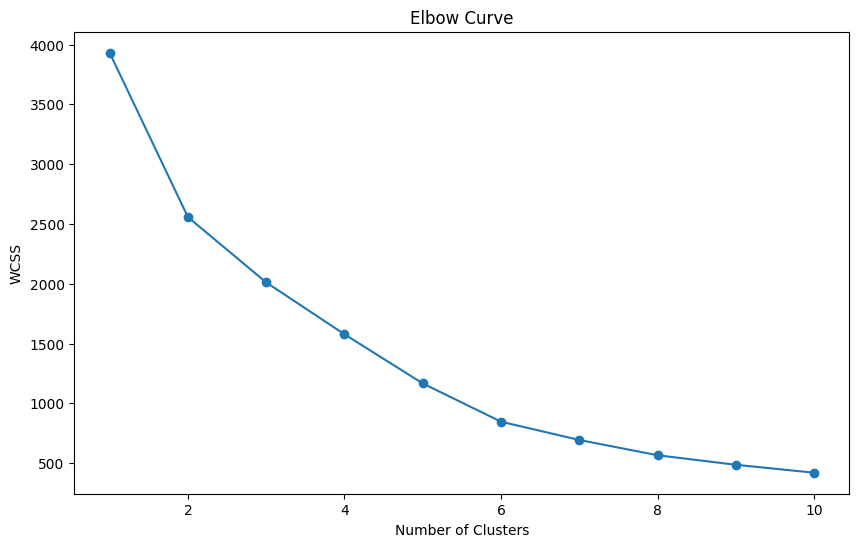

In [ ]:
#Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Choose the number of clusters based on the elbow curve
num_clusters = 5

In [ ]:
#Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# DBSCAN Clustering
#  Determine the optimal values for epsilon and min_samples
# (You can use techniques like k-distance plot or silhouette analysis)
#Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

In [ ]:
# Analyzing the Clusters
# Add the clustering results to the original dataset
data['HC Cluster'] = hc_clusters
data['K-means Cluster'] = kmeans_clusters
data['DBSCAN Cluster'] = dbscan_clusters

In [ ]:
#Calculate the mean values of each variable for each cluster
cluster_means = data.groupby('HC Cluster').mean()

In [ ]:
#Print the cluster means
print(cluster_means)

                  Balance  Qual_miles   Bonus_miles  Bonus_trans  \
HC Cluster                                                         
0            50205.443463  146.025177   3899.758834     6.565813   
1           109839.731801  156.578544  40552.823755    19.584291   
2           102237.994093  138.378903  32269.287764    17.584810   
3            77793.642857    0.000000  11625.214286    16.785714   

            Flight_miles_12mo  Flight_trans_12  Days_since_enroll    Award?  \
HC Cluster                                                                    
0                  462.312721         1.386042        3753.905919  0.246908   
1                  568.250958         1.697318        4734.321839  0.586207   
2                  406.579747         1.200000        4548.885232  0.510549   
3                  523.678571         1.678571        3911.821429  0.392857   

            cc1_miles_1  cc1_miles_2  ...  cc2_miles_1  cc2_miles_2  \
HC Cluster                            ...    